In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('HousingData.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Unnamed: 80
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN


In [3]:
dataset = dataset.rename(columns={'Unnamed: 80':'Price'})
dataset = dataset[dataset['Price'].notna()]
dataset = dataset.fillna(0)
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Price
1459,2920,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1460,2921,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
1461,2922,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
1462,2923,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000.0
1463,2924,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [4]:
# Using a different approach to make a prediction
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Price
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,3649.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,2920.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,3284.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,3649.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,4014.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,4379.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1459 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  Overa

In [6]:
print(dataset['MSZoning'].unique())
print(dataset['Street'].unique())
print(dataset['LotShape'].unique())
print(dataset['LandContour'].unique())
print(dataset['Utilities'].unique())
print(dataset['SaleType'].unique())
print(dataset['SaleCondition'].unique())

['RL' 'RM' 'C (all)' 'FV' 'RH']
['Pave' 'Grvl']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'NoSeWa']
['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']
['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


In [7]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Price
1459,2920,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1460,2921,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
1461,2922,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
1462,2923,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000.0
1463,2924,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,4375,60,RL,62.0,7917,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,175000.0
2915,4376,20,RL,85.0,13175,Pave,0,Reg,Lvl,AllPub,...,0,0,MnPrv,0,0,2,2010,WD,Normal,210000.0
2916,4377,70,RL,66.0,9042,Pave,0,Reg,Lvl,AllPub,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0
2917,4378,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,142125.0


In [8]:
# For the time being considering only the numerical values
# Using Lasso Regression for Feature Selection
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5,shuffle=True)
splits = kfold.split(dataset[['LotFrontage','LotArea',
                 'PoolArea','MiscVal',
                 'BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea',
                 'MasVnrArea','OverallQual','OverallCond','BsmtFinSF1',
                 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']],dataset['Price'])


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score


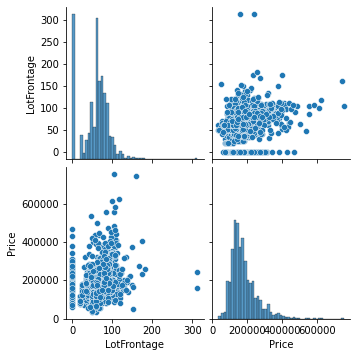

In [20]:
import seaborn as sns
sns.pairplot(dataset,vars=['LotFrontage','Price'])

In [31]:
# finding outliers
columns = ['LotFrontage','LotArea',
                 'PoolArea','MiscVal',
                 'BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea',
                 'MasVnrArea','OverallQual','OverallCond','BsmtFinSF1',
                 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']

q3,q1 = np.percentile(dataset['LotFrontage'],[75,25])
IQR  = q3 - q1
UF = q3 + (1.5*IQR)
LF = q1 - (1.5*IQR)
indexes = []
for i in dataset['LotFrontage']:
    if(i>UF or i<LF):
        #print(i)
        index = dataset.index[dataset['LotFrontage'] == i][0]
        indexes.append(index)
print(indexes)

[1630, 1656, 1656, 1736, 1772, 1905, 2266, 2368, 2393, 2566, 2586, 2632, 2641, 2670, 2393, 2796]


Int64Index([2368], dtype='int64')

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = ['LotFrontage','LotArea',
                 'PoolArea','MiscVal',
                 'BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea',
                 'MasVnrArea','OverallQual','OverallCond','BsmtFinSF1',
                 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']

data = scaler.fit_transform(dataset[['LotFrontage','LotArea',
                 'PoolArea','MiscVal',
                 'BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea',
                 'MasVnrArea','OverallQual','OverallCond','BsmtFinSF1',
                 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']])
data


array([[ 0.2128772 , -0.20714171, -0.06869175, ..., -0.28865283,
        -0.94459061, -0.45930254],
       [ 0.64574726, -0.09188637, -0.06869175, ..., -0.28865283,
        -0.64122799,  0.46646492],
       [ 0.29945121,  0.07347998, -0.06869175, ..., -0.28865283,
        -0.30164298, -0.31336875],
       ...,
       [ 0.2417352 , -0.14781027, -0.06869175, ..., -0.28865283,
         0.70126476,  0.21564122],
       [ 0.29945121, -0.08016039, -0.06869175, ...,  6.09218785,
        -1.28417562,  0.04690528],
       [ 0.50145724, -0.05811155, -0.06869175, ...,  1.50964046,
        -0.97628521,  0.45278362]])

In [32]:
MAE = []
alpha = np.arange(0.1,50,0.1)
for i in range(1,99):
    model  = Lasso(alpha = alpha[i])
    cross_val = cross_val_score(model, data, dataset['Price'], cv=5, scoring='neg_mean_squared_error')
    
    MAE.append(sum(abs(cross_val))/5)

print('Good value of alpha is : {0} with absolute error {1} '.format(alpha[MAE.index(min(MAE))],abs(min(MAE))))
model = Lasso(alpha = alpha[MAE.index(min(MAE))])
model.fit(data, dataset['Price'])

print('The Feature importance are {0}'.format(abs(model.coef_)))

    

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.187e+10, tolerance: 6.990e+08
  model = cd_fast.enet_coordinate_descent(


Good value of alpha is : 9.8 with absolute error 1753238802.3790898 
The Feature importance are [ 2005.02268667  8536.36321393   900.47845099   223.97990522
  1840.3237372    588.64569894 13789.49844555  2150.6702732
  8797.09198718 41700.92819232  3920.83725588  6402.18631821
   645.90528952     0.          9963.03762803]


In [12]:
significance = abs(model.coef_)
dataset_1 = data
coef_mapping = {}
for i,j in enumerate(significance):
    coef_mapping[columns[i]]=significance[i]
coef_mapping

{'LotFrontage': 2005.022686666848,
 'LotArea': 8536.363213929308,
 'PoolArea': 900.4784509880027,
 'MiscVal': 223.97990521676317,
 'BsmtFullBath': 1840.3237372012293,
 'BsmtHalfBath': 588.6456989396182,
 'GarageCars': 13789.498445551306,
 'GarageArea': 2150.670273203834,
 'MasVnrArea': 8797.091987178484,
 'OverallQual': 41700.92819231687,
 'OverallCond': 3920.8372558811557,
 'BsmtFinSF1': 6402.186318214984,
 'BsmtFinSF2': 645.9052895188216,
 'BsmtUnfSF': 0.0,
 'TotalBsmtSF': 9963.037628034035}

In [13]:
significance = np.sort(significance)
significance

array([    0.        ,   223.97990522,   588.64569894,   645.90528952,
         900.47845099,  1840.3237372 ,  2005.02268667,  2150.6702732 ,
        3920.83725588,  6402.18631821,  8536.36321393,  8797.09198718,
        9963.03762803, 13789.49844555, 41700.92819232])

In [14]:
coeff_1 = {i for i in coef_mapping if coef_mapping[i]==significance[len(significance)-1]}
coeff_2 = {i for i in coef_mapping if coef_mapping[i]==significance[len(significance)-2]}
coeff_3 = {i for i in coef_mapping if coef_mapping[i]==significance[len(significance)-3]}
coeff_4 = {i for i in coef_mapping if coef_mapping[i]==significance[len(significance)-4]}
coeff_5 = {i for i in coef_mapping if coef_mapping[i]==significance[len(significance)-5]}
coeff_6 = {i for i in coef_mapping if coef_mapping[i]==significance[len(significance)-6]}
coeff_7 = {i for i in coef_mapping if coef_mapping[i]==significance[len(significance)-7]}

print(coeff_1)
print(coeff_2)
print(coeff_3)
print(coeff_4)
print(coeff_5)
print(coeff_6)
print(coeff_7)

{'OverallQual'}
{'GarageCars'}
{'TotalBsmtSF'}
{'MasVnrArea'}
{'LotArea'}
{'BsmtFinSF1'}
{'OverallCond'}


In [15]:
dataset_2 = dataset[['OverallQual','GarageCars','OverallCond','TotalBsmtSF','LotArea','BsmtFinSF1','MasVnrArea']]
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(dataset_2,dataset['Price'],test_size=0.3)
model_2 = LinearRegression()
model_2.fit(x_train,y_train)
print('R2 value in training is : {0}'.format(model_2.score(x_train,y_train)))

R2 value in training is : 0.7139192314760625


In [16]:
print('R2 value in test is: {0}'.format(model_2.score(x_test,y_test)))

R2 value in test is: 0.7795321539880269


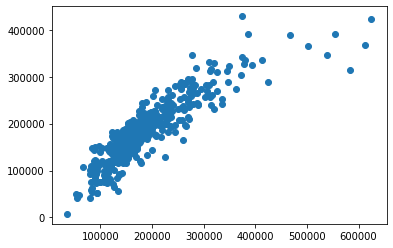

In [17]:
plt.figure()
plt.scatter(y_test,model_2.predict(x_test),label ='Predicted Values')
plt.show()